In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model


In [3]:
# Get the data
!wget https://lazyprogrammer.me/course_files/spam.csv

--2021-04-14 13:25:49--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3030::ac43:d5a6, 2606:4700:3031::6815:17d2, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3030::ac43:d5a6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.52MB/s    in 0.3s    

2021-04-14 13:25:50 (1.52 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
!head spam.csv

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename the columns to something more meaningful
df.columns = ['labels', 'data']

df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [20]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [22]:
# get word to integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7212 unique tokens.


In [26]:
# pad sequences to get an N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of train data tensor: ', data_train.shape)

# get sequence length T
T  = data_train.shape[1]

Shape of train data tensor:  (3733, 189)


In [25]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('shape of test data tensor: ', data_test.shape)

shape of test data tensor:  (1839, 189)


In [28]:
# create the model

# Embedding dimensionality
D = 20

# Hidden dimensionality
M = 15


""" we want the size of the embedding to be (V + 1) x D 
because the first index starts from 1 and not 0
So if the final index of the embedding matrix is V, 
then it must have size V + 1."""

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [32]:
# compile and fit
model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
        )

print('Training model...')

r = model.fit(
        data_train, Ytrain, epochs=20, validation_data=(data_test, Ytest))

Training model...
Epoch 1/20
117/117 [==============================] - 9s 55ms/step - loss: 0.2044 - accuracy: 0.8848 - val_loss: 0.2210 - val_accuracy: 0.9163
Epoch 2/20
117/117 [==============================] - 6s 54ms/step - loss: 0.1829 - accuracy: 0.9253 - val_loss: 0.2035 - val_accuracy: 0.9184
Epoch 3/20
117/117 [==============================] - 6s 49ms/step - loss: 0.1626 - accuracy: 0.9454 - val_loss: 0.1928 - val_accuracy: 0.9244
Epoch 4/20
117/117 [==============================] - 6s 49ms/step - loss: 0.1459 - accuracy: 0.9669 - val_loss: 0.1841 - val_accuracy: 0.9391
Epoch 5/20
117/117 [==============================] - 6s 54ms/step - loss: 0.1255 - accuracy: 0.9778 - val_loss: 0.1789 - val_accuracy: 0.9396
Epoch 6/20
117/117 [==============================] - 7s 63ms/step - loss: 0.1168 - accuracy: 0.9793 - val_loss: 0.1814 - val_accuracy: 0.9364
Epoch 7/20
117/117 [==============================] - 7s 63ms/step - loss: 0.1115 - accuracy: 0.9776 - val_loss: 0.1631 - va

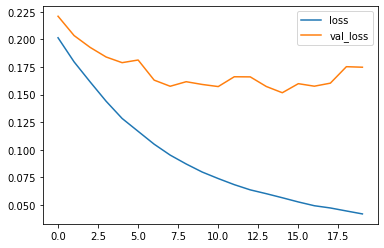

In [33]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

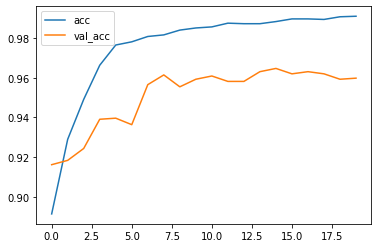

In [34]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()